#Housing Analysis

Business Problem: 

Real estate company interested in current trends in what affects housing sales, in order to make recommndations to clients? 



In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [197]:
df = pd.read_csv('data/kc_house_data.csv')

In [198]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [199]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [201]:
from datetime import datetime
df["date"]=pd.to_datetime(df["date"])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [202]:
#pososibly ignore date, view, sqft_above, sqft_basement, yr_renovated, 
#zipcode, lat, long, sqft_living15, sqft_lot15



In [203]:
len(df)

21597

In [204]:
df.nlargest(10, 'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
4092,1997200215,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015-01-06,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,2014-08-08,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
16830,8823900290,2015-03-17,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320


In [205]:
df = df.drop([15856])  #dropping entry with 33 bedrooms but only 1.75 baths, 1 floor, andn 1620 sqft

In [206]:
df=df.drop_duplicates('id')


In [207]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [208]:
#waterfront, view, and yeaer renovated are the onlny ones with null, was going to focus on other values anyways
df = df.drop(['yr_renovated'], axis=1)
df = df.drop(['waterfront'], axis=1)
df = df.drop(['view'], axis=1)
#dropping sqft basement as object class
df = df.drop(['sqft_basement'], axis=1)

In [209]:
df.nlargest(10, 'bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,3,7,2400,1918,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,3,9,2500,2008,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,4,7,3010,1958,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,4,7,1860,1913,98105,47.6635,-122.320,1810,3745
4092,1997200215,2014-05-07,599999.0,9,4.50,3830,6988,2.5,3,7,2450,1938,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015-01-06,700000.0,9,3.00,3680,4400,2.0,3,7,2830,1908,98102,47.6374,-122.324,1960,2450
6073,9822700190,2014-08-08,1280000.0,9,4.50,3650,5000,2.0,3,8,2530,1915,98105,47.6604,-122.289,2510,5000
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,3,7,4050,1996,98144,47.5923,-122.301,1448,3866
16830,8823900290,2015-03-17,1400000.0,9,4.00,4620,5508,2.5,3,11,3870,1915,98105,47.6684,-122.309,2710,4320
18428,8823901445,2015-03-13,934000.0,9,3.00,2820,4480,2.0,3,7,1880,1918,98105,47.6654,-122.307,2460,4400


In [210]:
df.nlargest(10, 'sqft_living')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,3,12,9410,1999,98053,47.6675,-121.986,4850,217800
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,4,13,8570,1910,98102,47.6298,-122.323,3940,8800
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,3,11,7680,1940,98004,47.6500,-122.214,3930,25449
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,3,13,8860,2001,98039,47.6305,-122.240,4540,42730
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,3,12,4820,1983,98040,47.5570,-122.210,3270,10454
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,3,13,6200,2001,98039,47.6289,-122.233,3560,24345
14542,2303900035,2014-06-11,2890000.0,5,6.25,8670,64033,2.0,3,13,6120,1965,98177,47.7295,-122.372,4140,81021
18288,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,3,11,8020,2001,98006,47.5675,-122.189,4160,18969
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,3,12,5990,1999,98033,47.6767,-122.211,3430,26788
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,3,12,6720,2009,98004,47.6232,-122.220,4600,21750


In [211]:
#df = df.drop(['yr_renovated'], axis=1)

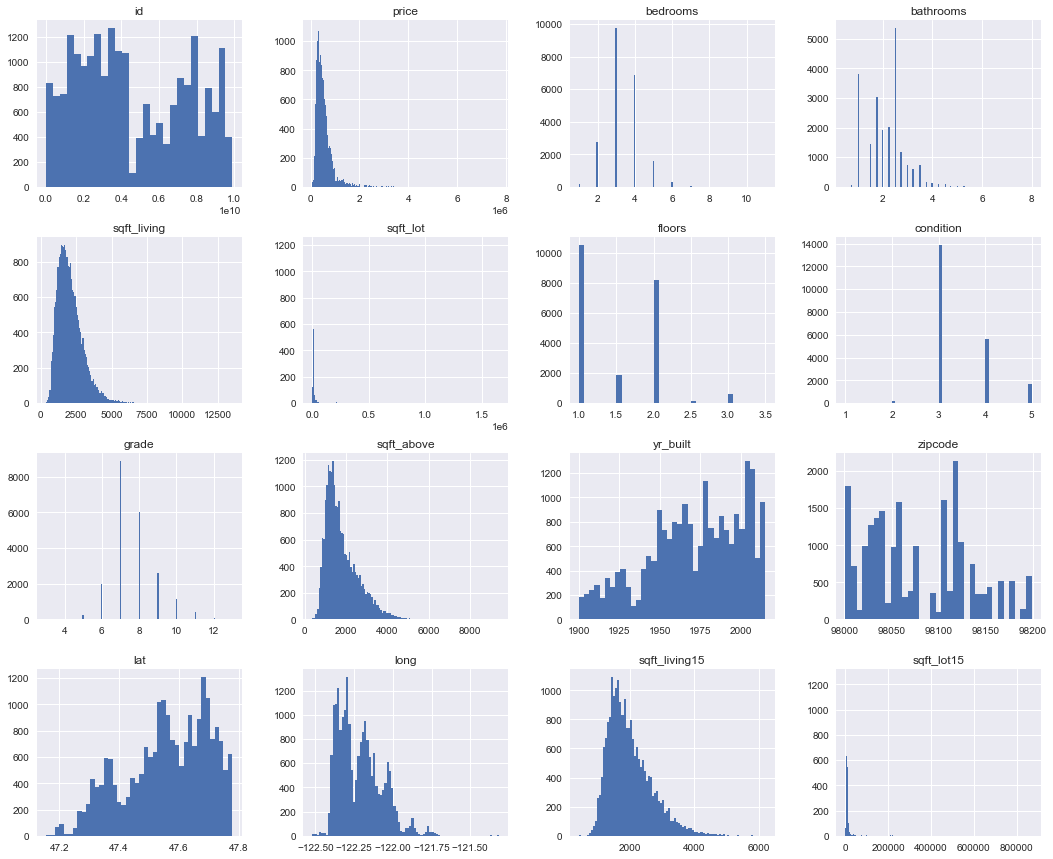

In [212]:
df.hist(figsize=(18,15), bins='auto');


In [213]:
#subset = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
          #'grade']

In [214]:
#bedrooms, bathrooms, floors, waterfront, view, conditiono, grade are categorical 
#prce, sqft_living, sqft_above, sqfit_living15, sqft_lot15 are continuous and appear to be log
#normally distrubed 

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21419 non-null  int64         
 1   date           21419 non-null  datetime64[ns]
 2   price          21419 non-null  float64       
 3   bedrooms       21419 non-null  int64         
 4   bathrooms      21419 non-null  float64       
 5   sqft_living    21419 non-null  int64         
 6   sqft_lot       21419 non-null  int64         
 7   floors         21419 non-null  float64       
 8   condition      21419 non-null  int64         
 9   grade          21419 non-null  int64         
 10  sqft_above     21419 non-null  int64         
 11  yr_built       21419 non-null  int64         
 12  zipcode        21419 non-null  int64         
 13  lat            21419 non-null  float64       
 14  long           21419 non-null  float64       
 15  sqft_living15  2141

In [216]:
#bedrooms, bathrooms, floors, waterfront, view, conditiono, grade are categorical 
#bedrooms, bathrooms, floors, waterfront, view, conditiono, and grade should be changed to string
df['bedrooms'] = df['bedrooms'].astype('str')
df['bathrooms']= df['bathrooms'].astype('str')
df['floors'] = df['floors'].astype('str')
df['condition']=df['condition'].astype('str')
df['grade']=df['grade'].astype('str')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21419 non-null  int64         
 1   date           21419 non-null  datetime64[ns]
 2   price          21419 non-null  float64       
 3   bedrooms       21419 non-null  object        
 4   bathrooms      21419 non-null  object        
 5   sqft_living    21419 non-null  int64         
 6   sqft_lot       21419 non-null  int64         
 7   floors         21419 non-null  object        
 8   condition      21419 non-null  object        
 9   grade          21419 non-null  object        
 10  sqft_above     21419 non-null  int64         
 11  yr_built       21419 non-null  int64         
 12  zipcode        21419 non-null  int64         
 13  lat            21419 non-null  float64       
 14  long           21419 non-null  float64       
 15  sqft_living15  2141

In [217]:
#Check the elinearity assumption for chohsen features with target variable using scatter plots 
#DO I NEED TO DO SOMETHING ELSE HERE? 

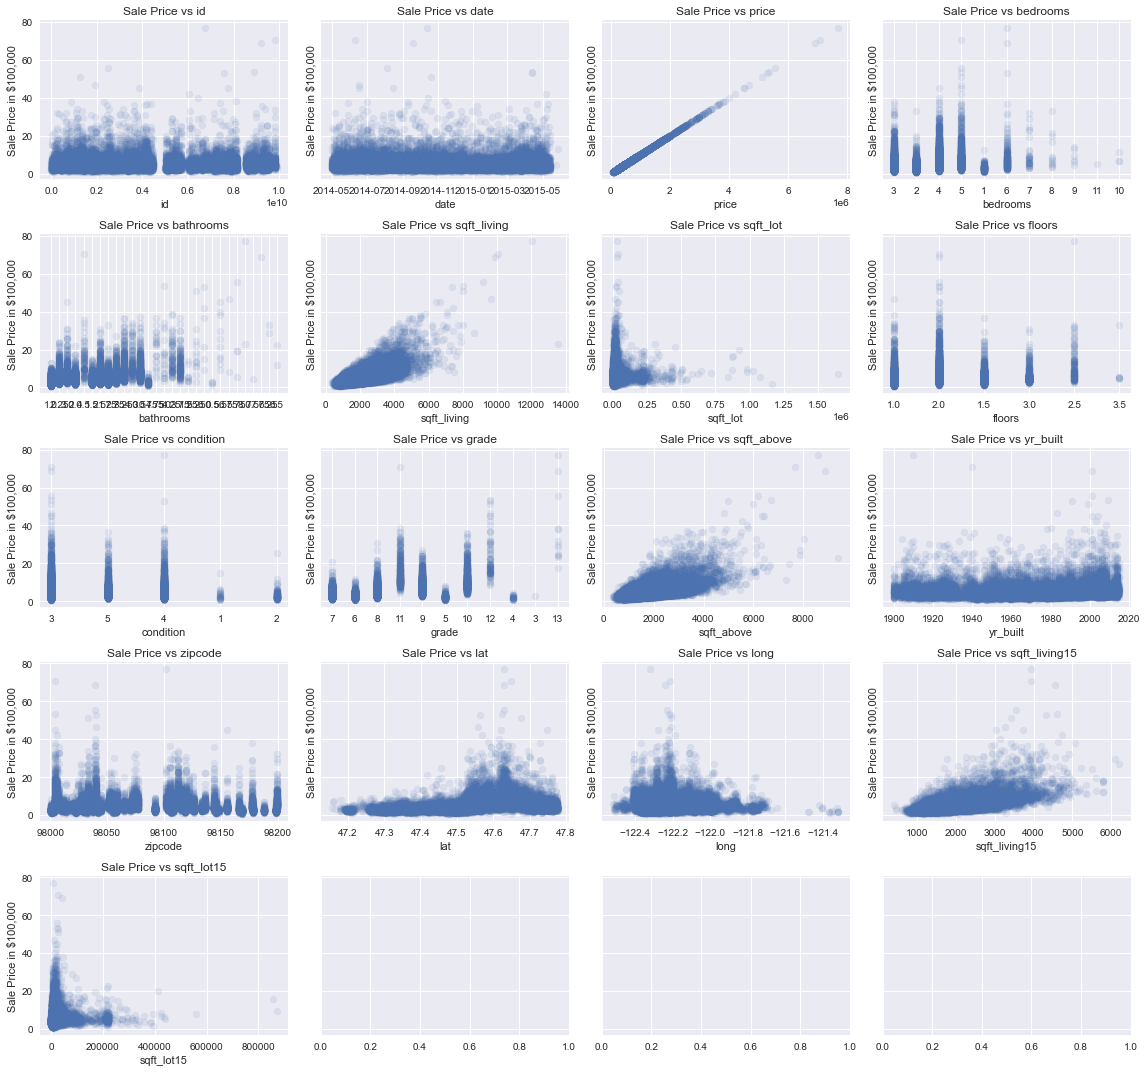

In [218]:

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

#sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15

In [221]:
feats = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
         'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
corr = df[feats].corr()
corr

,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
sqft_living,1.000000,0.172582,0.876534,0.316633,-0.198986,0.050762,0.240197,0.756184,0.183832
sqft_lot,0.172582,1.000000,0.183204,0.052305,-0.129418,-0.085815,0.230261,0.143798,0.717742
sqft_above,0.876534,0.183204,1.000000,0.422957,-0.260789,-0.002001,0.344138,0.731877,0.194436
yr_built,0.316633,0.052305,0.422957,1.000000,-0.346151,-0.148827,0.409154,0.324691,0.070115
zipcode,-0.198986,-0.129418,-0.260789,-0.346151,1.000000,0.266698,-0.564772,-0.278415,-0.147058
lat,0.050762,-0.085815,-0.002001,-0.148827,0.266698,1.000000,-0.136197,0.047528,-0.086213
long,0.240197,0.230261,0.344138,0.409154,-0.564772,-0.136197,1.000000,0.334655,0.255413
sqft_living15,0.756184,0.143798,0.731877,0.324691,-0.278415,0.047528,0.334655,1.000000,0.182756
sqft_lot15,0.183832,0.717742,0.194436,0.070115,-0.147058,-0.086213,0.255413,0.182756,1.000000


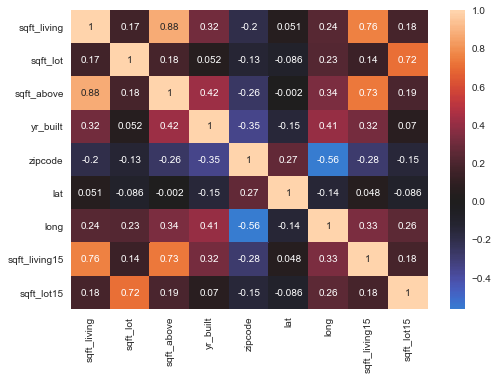

In [222]:
sns.heatmap(corr, center=0, annot=True);

In [223]:
#overlyhigh pairwise-correlation (r > .65) = sqft_living with sqft_above; sqft_lving with sqft_livingn15
#sqft_lot witht sqft_lot15, sqft_abovewithsqft_livingn15, sqft_lot witih hsqft_lot15

#get rid of sqft_living15 and sqft_lot15, sqft_above

df = df.drop(['sqft_living15'], axis=1)
df = df.drop(['sqft_lot15'], axis=1)
df = df.drop(['sqft_above'], axis=1)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21419 non-null  int64         
 1   date           21419 non-null  datetime64[ns]
 2   price          21419 non-null  float64       
 3   bedrooms       21419 non-null  object        
 4   bathrooms      21419 non-null  object        
 5   sqft_living    21419 non-null  int64         
 6   sqft_lot       21419 non-null  int64         
 7   floors         21419 non-null  object        
 8   condition      21419 non-null  object        
 9   grade          21419 non-null  object        
 10  sqft_above     21419 non-null  int64         
 11  yr_built       21419 non-null  int64         
 12  zipcode        21419 non-null  int64         
 13  lat            21419 non-null  float64       
 14  long           21419 non-null  float64       
 15  sqft_living15  2141

In [220]:
#normalizing the data so thaht all numeric columns are on the same scale 
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built',
            'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])
df.describe()
    
##sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15

,id,price,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.141900e+04,2.141900e+04,2.141900e+04,2.141900e+04,2.141900e+04,2.141900e+04,21419.000000,2.141900e+04,2.141900e+04,2.141900e+04,2.141900e+04
mean,4.581042e+09,5.407347e+05,1.185537e-16,-1.557132e-16,-5.814170e-16,-3.059445e-15,98077.873197,-2.313575e-14,-4.596769e-12,2.032498e-16,7.624458e-17
std,2.876790e+09,3.679391e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,53.478453,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000102e+06,7.800000e+04,-1.864507e+00,-3.517423e-01,-1.714989e+00,-2.419207e+00,98001.000000,-2.917180e+00,-2.167899e+00,-2.318492e+00,-4.433923e-01
25%,2.123375e+09,3.225000e+05,-7.108586e-01,-2.429099e-01,-7.134160e-01,-6.497392e-01,98033.000000,-6.421206e-01,-8.112832e-01,-7.270415e-01,-2.807006e-01
50%,3.904921e+09,4.500000e+05,-1.775685e-01,-1.809331e-01,-2.789988e-01,1.329101e-01,98065.000000,8.592742e-02,-1.152187e-01,-2.164938e-01,-1.885488e-01
75%,7.308900e+09,6.450000e+05,5.080903e-01,-1.068211e-01,5.174328e-01,8.815311e-01,98117.000000,8.504139e-01,6.305648e-01,5.566212e-01,-9.835351e-02
max,9.900000e+09,7.700000e+06,1.246903e+01,3.939713e+01,9.193710e+00,1.494039e+00,98199.000000,1.568721e+00,6.383752e+00,6.158059e+00,3.139097e+01


In [ ]:
#next step: one-hot encodng categorical columns